In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['userid','time','extype','examount','mark']
bank_detail_train = pd.read_csv("../../pcredit/train/bank_detail_train.txt",header=None)
bank_detail_test = pd.read_csv("../../pcredit/test/bank_detail_test.txt",header=None)

bank_detail = pd.concat([bank_detail_train,bank_detail_test])
bank_detail.columns = names

In [67]:
bank_detail['count1'] = np.zeros(bank_detail.shape[0])
bank_detail.head()

,userid,time,extype,examount,mark,count1
0,6965,5894316387,0,13.756664,0,0.0
1,6965,5894321388,1,13.756664,0,0.0
2,6965,5897553564,0,14.449810,0,0.0
3,6965,5897563463,1,10.527763,0,0.0
4,6965,5897564598,1,13.651303,0,0.0


In [39]:
##  1)统计收入 examount 的均值  2) 统计支出 examount  的均值
amount_data = pd.pivot_table(bank_detail,index=['userid','extype'],values=['examount'],aggfunc=np.mean)
amount_data.head()

examount
userid extype           
1      0       13.734079
       1       13.255397
3      0       13.249264
       1        9.834236
4      0       12.128566

In [40]:
amount_data = amount_data.unstack()
amount_data.columns = ['examount#0','examount#1']
amount_data.head()

,examount#0,examount#1
userid,,
1,13.734079,13.255397
3,13.249264,9.834236
4,12.128566,10.920132
9,14.371789,12.867697
10,12.720866,12.296680


In [54]:
amount_data_c = amount_data.copy()
amount_data_c['sub'] = amount_data_c['examount#0'] - amount_data_c['examount#1']
amount_data_c.head()

,examount#0,examount#1,sub
userid,,,
1,13.734079,13.255397,0.478681
3,13.249264,9.834236,3.415028
4,12.128566,10.920132,1.208435
9,14.371789,12.867697,1.504092
10,12.720866,12.296680,0.424186


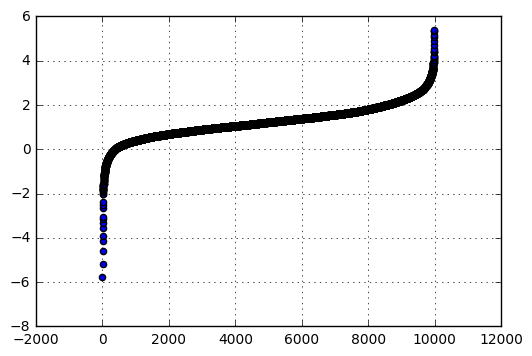

In [55]:
amount_data_c0 = amount_data_c['sub'].sort_values()
nn = range(len(amount_data_c0))
plt.scatter(nn,amount_data_c0)
plt.grid(True)
plt.show()

In [56]:
def getNum(x):
    if x < 0: return 1
    if x < 1: return 2
    if x < 1.5: return 3
    if x < 3: return 4
    return 5
amount_data_c['sub0'] = amount_data_c['sub'].apply(lambda x:getNum(x))
amount_data_c.drop(['examount#0','examount#1','sub'],axis=1,inplace=True)
amount_data_c.head()

,sub0
userid,
1,2
3,5
4,3
9,4
10,2


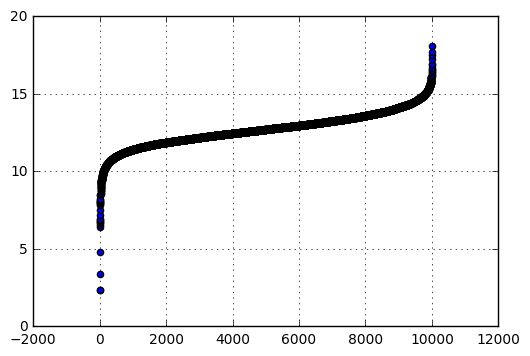

In [63]:
examount0 = amount_data['examount#0'].sort_values()
nn = range(len(examount0))
plt.scatter(nn,examount0)
plt.grid(True)
plt.show()

In [64]:
def getNum(x):
    if x < 11: return 1
    if x < 12.5: return 2
    if x < 14: return 3
    if x < 15: return 4
    return 5
amount_data['examount#00'] = amount_data['examount#0'].apply(lambda x:getNum(x))
amount_data.head()

,examount#0,examount#1,examount#00
userid,,,
1,13.734079,13.255397,3
3,13.249264,9.834236,3
4,12.128566,10.920132,2
9,14.371789,12.867697,4
10,12.720866,12.296680,3


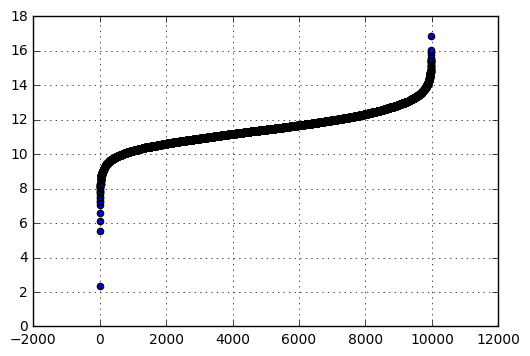

In [65]:
examount1 = amount_data['examount#1'].sort_values()
nn = range(len(examount1))
plt.scatter(nn,examount1)
plt.grid(True)
plt.show()

In [66]:
def getNum(x):
    if x < 9: return 1
    if x < 11: return 2
    if x < 12: return 3
    if x < 14: return 4
    return 5
amount_data['examount#11'] = amount_data['examount#1'].apply(lambda x:getNum(x))
amount_data.head()

,examount#0,examount#1,examount#00,examount#11
userid,,,,
1,13.734079,13.255397,3,4
3,13.249264,9.834236,3,2
4,12.128566,10.920132,2,2
9,14.371789,12.867697,4,4
10,12.720866,12.296680,3,4


In [67]:
amount_data.drop(['examount#0','examount#1'],axis=1,inplace=True)
amount_data.head()

,examount#00,examount#11
userid,,
1,3,4
3,3,2
4,2,2
9,4,4
10,3,4


In [10]:
## 1)统计支出 1 的次数   2)统计收入 0 的次数  3)统计工资 mark==1 的次数 4) 统计非工资次数 mark==0
extype_data = bank_detail[['userid','extype']]
extype_data1 = pd.pivot_table(extype_data,index=['userid'],values=['extype'],aggfunc=np.sum)
extype_data01 = extype_data1.copy()
extype_data1.head()

,extype
userid,
1,51
3,507
4,195
9,11
10,183


In [12]:
mark_data = bank_detail[['userid','extype','mark']]
mark_data = mark_data[mark_data.extype==0]
mark_data.head()

,userid,extype,mark
0,6965,0,0
2,6965,0,0
10,6965,0,0
11,6965,0,0
19,6965,0,0


In [13]:
mark_1_data = pd.pivot_table(mark_data,index=['userid'],values=['mark'],aggfunc=np.sum)
mark_1_data.head()

,mark
userid,
1,0
3,0
4,0
9,0
10,0


In [14]:
mark_0_data = mark_data.copy()
mark_0_data['mark0'] = mark_data['mark'].apply(lambda x: 1 if x==0 else 0)
mark_0_data = pd.pivot_table(mark_0_data,index=['userid'],values=['mark0'],aggfunc=np.sum)
mark_0_data.head()

,mark0
userid,
1,35
3,172
4,96
9,13
10,141


In [15]:
mark_01_data = mark_0_data.join(mark_1_data)
mark_01_data.head()

,mark0,mark
userid,,
1,35,0
3,172,0
4,96,0
9,13,0
10,141,0


In [8]:
extype_data0 = extype_data.copy()
extype_data0['extype0'] = extype_data0['extype'].apply(lambda x:1 if x==0 else 0)
extype_data0.head()

,userid,extype,extype0
0,6965,0,1
1,6965,1,0
2,6965,0,1
3,6965,1,0
4,6965,1,0


In [9]:
extype_data0 = pd.pivot_table(extype_data0,index=['userid'],values=['extype0'],aggfunc=np.sum)
extype_data0.head()

,extype0
userid,
1,35
3,172
4,96
9,13
10,141


In [11]:
extype_data01 = extype_data01.join([extype_data0])
extype_data01.head()

,extype,extype0
userid,,
1,51,35
3,507,172
4,195,96
9,11,13
10,183,141


In [17]:
##  extype 和 mark 的数据区别不大,只保留 extype
extype_data01.to_csv('../data/extype_data01.csv')

In [16]:
extype_mark = extype_data01.join(mark_01_data)
extype_mark.head()

,extype,extype0,mark0,mark
userid,,,,
1,51,35,35.0,0.0
3,507,172,172.0,0.0
4,195,96,96.0,0.0
9,11,13,13.0,0.0
10,183,141,141.0,0.0


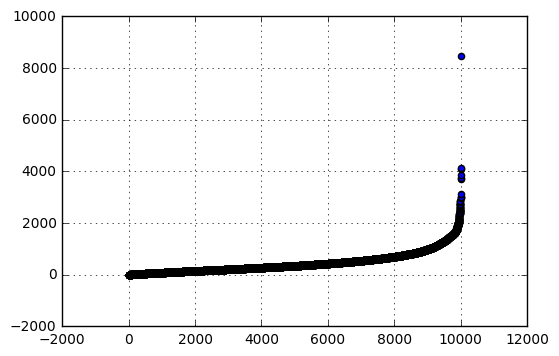

In [30]:
extype_data = extype_mark['extype'].sort_values()
nn = range(len(extype_data))
plt.scatter(nn,extype_data)
plt.grid(True)
plt.show()

In [33]:
def getNum(x):
    if x < 500: return 1
    if x < 1000: return 2
    if x < 1500: return 3
    if x < 2000: return 4
    return 5
extype_mark['extype#11'] = extype_mark['extype'].apply(lambda x:getNum(x))
extype_mark.head()

,extype,extype0,mark0,mark,extype#11
userid,,,,,
1,51,35,35.0,0.0,1
3,507,172,172.0,0.0,2
4,195,96,96.0,0.0,1
9,11,13,13.0,0.0,1
10,183,141,141.0,0.0,1


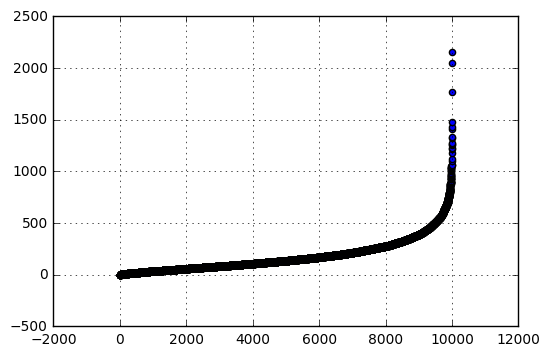

In [31]:
extype_data0 = extype_mark['extype0'].sort_values()
nn = range(len(extype_data0))
plt.scatter(nn,extype_data0)
plt.grid(True)
plt.show()

In [34]:
def getNum(x):
    if x < 125: return 1
    if x < 250: return 2
    if x < 400: return 3
    if x < 500: return 4
    return 5
extype_mark['extype0#1'] = extype_mark['extype0'].apply(lambda x:getNum(x))
extype_mark.head()

,extype,extype0,mark0,mark,extype#11,extype0#1
userid,,,,,,
1,51,35,35.0,0.0,1,1
3,507,172,172.0,0.0,2,2
4,195,96,96.0,0.0,1,1
9,11,13,13.0,0.0,1,1
10,183,141,141.0,0.0,1,2


In [68]:
datas = amount_data.join(extype_mark)
datas.head()

,examount#00,examount#11,extype,extype0,mark0,mark,extype#11,extype0#1
userid,,,,,,,,
1,3,4,51,35,35.0,0.0,1,1
3,3,2,507,172,172.0,0.0,2,2
4,2,2,195,96,96.0,0.0,1,1
9,4,4,11,13,13.0,0.0,1,1
10,3,4,183,141,141.0,0.0,1,2


In [69]:
datas.drop(['extype','extype0','mark0','mark'],axis=1,inplace=True)
datas.head()

,examount#00,examount#11,extype#11,extype0#1
userid,,,,
1,3,4,1,1
3,3,2,2,2
4,2,2,1,1
9,4,4,1,1
10,3,4,1,2


In [70]:
datas = datas.join([amount_data_c])
datas.head()

,examount#00,examount#11,extype#11,extype0#1,sub0
userid,,,,,
1,3,4,1,1,2
3,3,2,2,2,5
4,2,2,1,1,3
9,4,4,1,1,4
10,3,4,1,2,2


In [71]:
datas.to_csv("../data/train/bank_train_1.csv")

In [3]:
examount = bank_detail.examount
examount = examount.sort_values()
examount.shape[0]

6446606

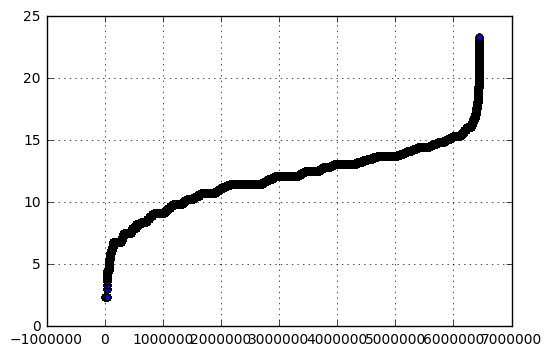

In [5]:
xx = range(len(bank_detail.examount))
plt.scatter(xx,examount)
plt.grid(True)
plt.show()

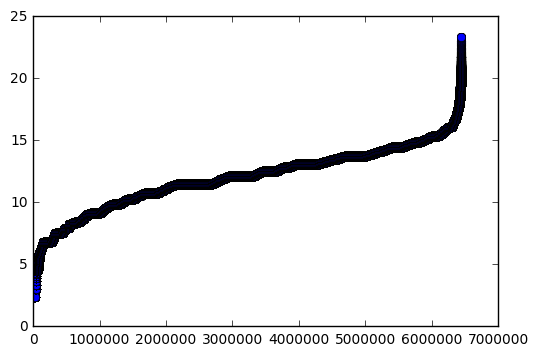

In [116]:
en = examount.shape[0]
plt.plot(range(en),examount,'o')
plt.show()

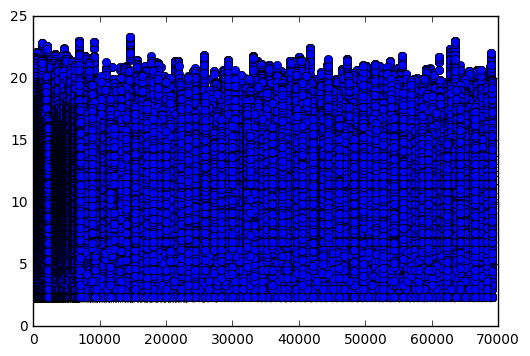

In [75]:
plt.plot(bank_detail['userid'],bank_detail['examount'],'o')
plt.show()

In [76]:
bank_make1 = bank_detail[bank_detail.mark==1]
bank_make1.head()

,userid,time,extype,examount,mark,count1
1632,29165,5899303887,0,14.847955,1,0.0
1684,29165,5901982287,0,14.717024,1,0.0
1740,29165,5904747087,0,14.637385,1,0.0
1785,29165,5907252687,0,14.911227,1,0.0
1824,29165,5909931087,0,14.931199,1,0.0


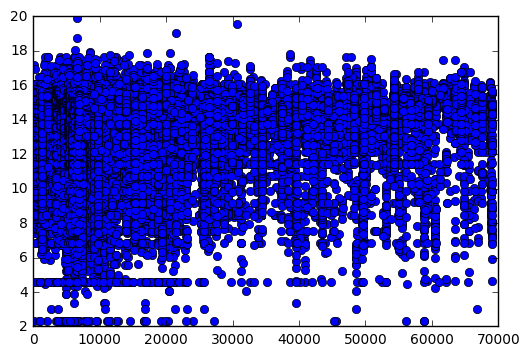

In [77]:
plt.plot(bank_make1['userid'],bank_make1['examount'],'o')
plt.show()

In [78]:
bank_make1_mean = pd.pivot_table(bank_make1,index=['userid'],values=['examount'],aggfunc=np.mean)
bank_make1_mean.head()

,examount
userid,
36,13.043108
38,10.884391
44,15.221781
67,12.281847
97,13.149357


In [117]:
bank_make1_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3157 entries, 36 to 69066
Data columns (total 1 columns):
examount    3157 non-null float64
dtypes: float64(1)
memory usage: 49.3 KB


/home/hadoop/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


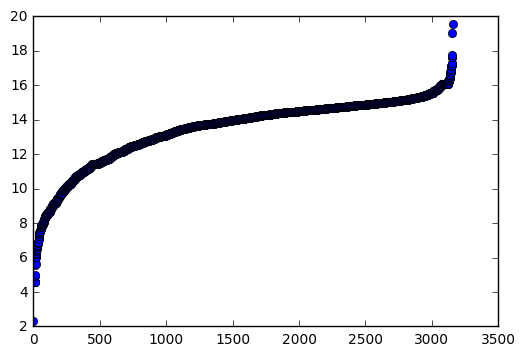

In [104]:
bank_make1_mean1000 = bank_make1_mean.head(70000)
bank_make1_mean1000 = bank_make1_mean1000.sort(['examount'])
n = bank_make1_mean1000.shape[0]
plt.plot(range(n),bank_make1_mean1000['examount'],'o')
plt.show()

In [99]:
bank_make1_mean1000.sort(['examount'])

/home/hadoop/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,examount
userid,
117,8.613493
38,10.884391
113,12.147231
67,12.281847
36,13.043108
97,13.149357
119,14.516389
104,14.602008
106,14.694764


In [73]:
for data in bank_detail[bank_detail.mark==1]:
    data['count1']=1
bank_detail[bank_detail.mark==1]

TypeError: 'str' object does not support item assignment

In [70]:
bank_detail[bank_detail.count1==1]

,userid,time,extype,examount,mark,count1


In [13]:
bank_data = bank_detail.copy()
bank_data.index = bank_data.userid
bank_data.drop(['userid'],axis=1,inplace=True)
bank_data.head()

,time,extype,examount,mark
userid,,,,
6965,5894316387,0,13.756664,0
6965,5894321388,1,13.756664,0
6965,5897553564,0,14.449810,0
6965,5897563463,1,10.527763,0
6965,5897564598,1,13.651303,0


In [20]:
bank_mark_data = bank_detail[bank_detail.mark==1]
bank_mark_data.head()

,userid,time,extype,examount,mark
1632,29165,5899303887,0,14.847955,1
1684,29165,5901982287,0,14.717024,1
1740,29165,5904747087,0,14.637385,1
1785,29165,5907252687,0,14.911227,1
1824,29165,5909931087,0,14.931199,1


In [43]:
bank_mark_mean = pd.pivot_table(bank_mark_data,index=['userid'],values=['examount'],aggfunc=np.mean)
bank_mark_mean.head()

,examount
userid,
36,13.043108
38,10.884391
44,15.221781
67,12.281847
97,13.149357


In [44]:
bank_mark_mean.shape

(3157, 1)

In [45]:
bank_mark_mean.describe()

,examount
count,3157.000000
mean,13.436980
std,2.024007
min,2.344542
25%,12.569088
50%,14.061329
75%,14.781669
max,19.545705


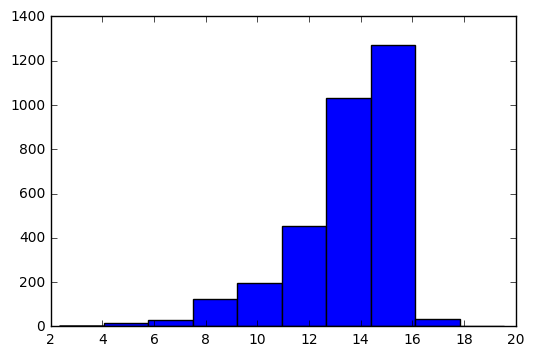

In [59]:
plt.hist(bank_mark_mean.examount,10)
plt.show()

In [61]:
#  对 new_bill_data_mean 的所有列数据进行标签编码
bank_mark_1 = pd.cut(bank_mark_mean['examount'],10,labels=range(10))
bank_mark_1.head()

userid
36    6
38    4
44    7
67    5
97    6
Name: examount, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [58]:
dd = bank_mark_1==12
print type(dd)
dd.head()

<class 'pandas.core.series.Series'>


userid
36     True
38    False
44    False
67    False
97     True
Name: examount, dtype: bool

In [64]:
bank_mark_mean[bank_mark_1==2].head()

,examount
userid,
2463,7.368332
2908,6.849967
3413,6.849967
4738,6.748547
6830,6.916111


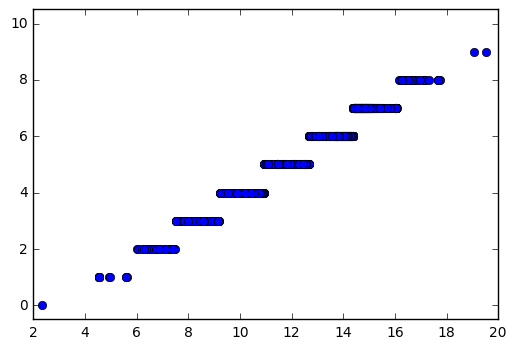

In [63]:
for j in range(0,10):
    plt.plot(bank_mark_mean[bank_mark_1==j],[j for i in bank_mark_1[bank_mark_1==j]],'bo')

plt.ylim([-0.5,10.5])
plt.show()

In [11]:
df = pd.pivot_table(bank_detail,index=['userid','extype'],values=['examount'],aggfunc=np.mean)
df.head()

examount
userid extype           
1      0       13.734079
       1       13.255397
3      0       13.249264
       1        9.834236
4      0       12.128566

In [12]:
df.shape

(19991, 1)